<a href="https://colab.research.google.com/github/bekdata/mohirdev_datascines/blob/main/_042%7Cregressiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/housing_LR.csv")
df.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0


In [3]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

In [4]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


In [5]:
data =df[df.district == "Мирзо-Улугбекский"]
data.head(10)

,Unnamed: 0,district,rooms,size,level,max_levels,price
18,18,Мирзо-Улугбекский,3,65.00,1,4,32500.0
24,24,Мирзо-Улугбекский,3,69.00,1,4,49900.0
73,73,Мирзо-Улугбекский,3,95.00,5,5,50000.0
76,76,Мирзо-Улугбекский,3,65.00,4,5,41500.0
114,114,Мирзо-Улугбекский,2,72.00,18,19,55000.0
115,115,Мирзо-Улугбекский,2,64.67,7,9,39414.0
118,118,Мирзо-Улугбекский,2,51.00,2,4,49000.0
119,119,Мирзо-Улугбекский,1,22.00,1,2,18000.0
133,133,Мирзо-Улугбекский,1,40.00,3,4,24000.0
142,142,Мирзо-Улугбекский,2,69.65,4,9,45188.0


In [6]:
data.shape

(1342, 7)

In [7]:
X = data['size']
X

,size
18,65.0
24,69.0
73,95.0
76,65.0
114,72.0
...,...
7260,72.0
7262,65.0
7267,50.0
7268,85.0


In [8]:
y = data['price']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

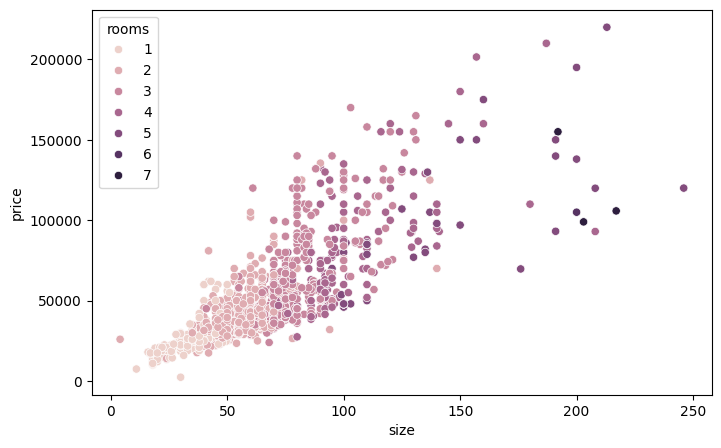

In [10]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=data, x=X, y=y, hue='rooms', )
plt.show()

In [11]:
Xmean = np.mean(X)
ymean = np.mean(y)

print(Xmean)
print(ymean)

68.58907600596126
53068.91207153502


Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [13]:
theta1 = sum((X-Xmean) * (y-ymean)) / sum((X-Xmean) ** 2)
print(f"{theta1=}")

theta1=824.4125771631817


In [14]:
theta0 = ymean - theta1 * Xmean
print(f"{theta0=}")

theta0=-3476.7848437808498


In [17]:
x_test = data.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")

y_test = data.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([ 70.,  50., 200.,  19.,  90.,  60.,  65.,  60., 110.,  80.])
y_test=array([ 66000.,  35000., 195000.,  20500.,  51000.,  63000.,  63000.,
        36000.,  78800.,  75000.])


`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [19]:
y_predict = theta0 + theta1 * x_test

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [20]:
MAE = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
print(f"{MAE=}")

MAE=13696.165548953626


In [23]:
RMSE = np.sqrt(np.sum(y_predict - y_test) ** 2) / len(y_test)
print(f"{RMSE= }")

RMSE= 5524.013639861043


# Sciket-learn yordamida linear regression qilish

In [24]:
data.shape

(1342, 7)

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

LR_model.fit(x_train, y_train)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(f"{theta0=}")
print(f"{theta1=}")



theta0=-3732.1918069458698
theta1=827.5853162192975


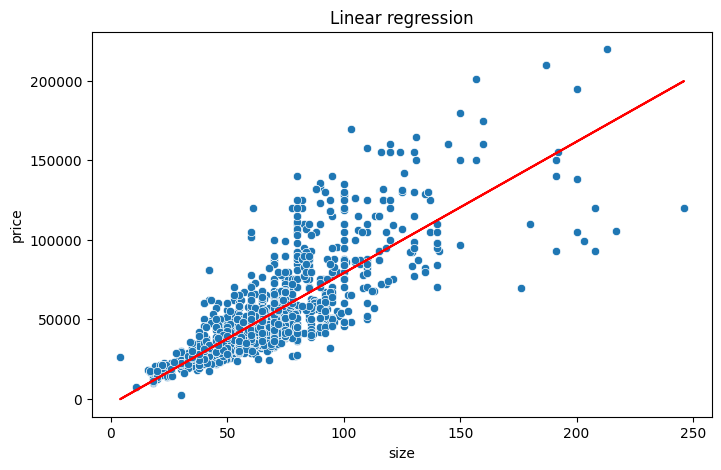

In [45]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=data, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel('size')
plt.ylabel('price')
plt.title('Linear regression')
plt.show()

In [38]:
import numpy as np

x_test = np.asanyarray(test_set[['size']])
print(f"{x_test=}")

y_test = np.asanyarray(test_set[['price']])
print(f"{y_test=}")

x_test=array([[ 70.  ],
       [ 50.  ],
       [200.  ],
       [ 19.  ],
       [ 90.  ],
       [ 60.  ],
       [ 65.  ],
       [ 60.  ],
       [110.  ],
       [ 80.  ],
       [ 94.  ],
       [100.  ],
       [ 46.  ],
       [ 53.  ],
       [ 75.  ],
       [ 54.  ],
       [ 45.  ],
       [ 50.  ],
       [ 44.  ],
       [ 60.  ],
       [ 60.  ],
       [ 45.  ],
       [ 65.  ],
       [ 86.  ],
       [ 75.  ],
       [ 60.  ],
       [ 41.  ],
       [ 54.  ],
       [ 45.  ],
       [ 77.  ],
       [ 84.  ],
       [ 53.  ],
       [ 80.  ],
       [ 75.  ],
       [124.  ],
       [ 38.  ],
       [ 60.  ],
       [ 65.  ],
       [ 40.  ],
       [102.  ],
       [ 55.  ],
       [ 48.  ],
       [ 31.  ],
       [ 40.  ],
       [101.  ],
       [ 78.27],
       [ 59.  ],
       [ 55.  ],
       [ 83.  ],
       [ 83.  ],
       [ 94.  ],
       [ 65.  ],
       [ 55.  ],
       [ 60.  ],
       [ 72.  ],
       [ 70.  ],
       [ 92.  ],
       [ 55.  ],
       

In [40]:
y_predict = LR_model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print(f'{MAE=}')
print(f'{RMSE=}')

MAE=13197.14347997628
RMSE=19007.191720967796
